<a href="https://colab.research.google.com/github/yzinly/first-repo/blob/main/%EC%9B%B9_%ED%81%AC%EB%A1%A4%EB%A7%81_%EB%AC%B4%EC%8B%A0%EC%82%AC_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 브랜드별 고객 구매 후기 데이터 분석

- 아디다스, 나이키, 무신사스탠다드 각 세 브랜드에서 구매량이 가장 많은 팬츠의 후기 데이터의 일부입니다. 


- 해당 데이터에서 고객들이 후기에 대한 응답을 어떻게 하는지 알아보고, 고객별 구매 특성괴 상품에 대한 인사이트를 찾습니다.


> 팬츠를 선택한 이유: 
>
>☞팬츠는 제품마다 사이즈가 다양하고 기준이 다릅니다. 그러므로 상품 고유의 특성에 따라 온라인으로 주문하기 까다로운 제품중 하나는 팬츠라고 생각했습니다.
> 
> ☞ 무신사에 입점된 베스트 팬츠 3개를 선정한 후, 고객 데이터를 수집하고 분석하면 상품별 특성과 구매 고객에 대한 차별화 된 인사이트를 얻을 수 있다고 생각하여 팬츠를 분석 하였습니다.

## 0. Data Description

1. 상품 데이터

> 상품 데이터는 선택된 팬츠 제품의 제품코드, 판매 색상, 사이즈 범위등이 있습니다. 


2. 고객 후기 데이터

> 후기를 남긴 고객이 생각하는 제품의 실제 착용감(사이즈, 밝기, 색감, 두께감)등을 나타내는 데이터입니다. 


3. 구매자 정보 데이터

> 후기를 남긴 고객의 개인정보등을 담은 데이터입니다. 성별, 키, 몸무게 등으로 고객이 직접 입력한 개인정보입니다.  

## 1. 라이브러리 로드 및 웹 크롤링

### 분석에 필요한 데이터와, 라이브러리를 불러옵니다.

In [ ]:
#데이터 분석 필수 라이브러리 세트 불러오기

import numpy as np
import pandas as pd
import requests # 크롤링에 사용하는 패키지
from bs4 import BeautifulSoup # html 변환에 사용함
import time

### 구매자 정보를 제외한 나머지 데이터 웹크롤링

In [ ]:
info = {'referer': 'https://store.musinsa.com/app/goods/1539054',
       'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.69 Safari/537.36'}

total_data = []
total_data2 = []
total_data3 = []
#total_data4 = []
for i in range(1,34):
    seed = np.random.randint(100)
    np.random.seed(seed)
    a = np.random.randint(5)
    time.sleep(a)
    print(f'{i} 페이지 크롤링 중')
    url = f'https://store.musinsa.com/app/reviews/goods_estimate_list/goods/1539054/0/{i}?similar_no=1800666&select_similar_no=&is_cache=N&sort=new'
    info = {'referer': 'https://store.musinsa.com/app/goods/1539054',
       'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.69 Safari/537.36'}
    resp = requests.get(url, headers = info)
    html = BeautifulSoup(resp.text, 'html.parser')
    data = [item.text.strip().replace('\n', ' ')for item in html.select('li> span')]
    data2 = [item.text for item in html.select('a.review-goods-information__name')]
    data3 = [item.text.strip() for item in html.select('span.review-goods-information__option')]
    data4 = [item.text.strip().replace('\n', '')for item in html.select('p.review-profile__body_information')]
    total_data = total_data + data 
    total_data2 = total_data2 +data2
    total_data3 = total_data3 + data3

1 페이지 크롤링 중
2 페이지 크롤링 중
3 페이지 크롤링 중
4 페이지 크롤링 중
5 페이지 크롤링 중
6 페이지 크롤링 중
7 페이지 크롤링 중
8 페이지 크롤링 중
9 페이지 크롤링 중
10 페이지 크롤링 중
11 페이지 크롤링 중
12 페이지 크롤링 중
13 페이지 크롤링 중
14 페이지 크롤링 중
15 페이지 크롤링 중
16 페이지 크롤링 중
17 페이지 크롤링 중
18 페이지 크롤링 중
19 페이지 크롤링 중
20 페이지 크롤링 중
21 페이지 크롤링 중
22 페이지 크롤링 중
23 페이지 크롤링 중
24 페이지 크롤링 중
25 페이지 크롤링 중
26 페이지 크롤링 중
27 페이지 크롤링 중
28 페이지 크롤링 중
29 페이지 크롤링 중
30 페이지 크롤링 중
31 페이지 크롤링 중
32 페이지 크롤링 중
33 페이지 크롤링 중


In [ ]:
pd.options.display.max_rows = 500
pd.options.display.max_rows = 20000

In [ ]:
df = pd.DataFrame(np.array(total_data).reshape(-1,4),columns= ['사이즈','밝기', '색감','두께감'])
df['color'] = np.array(total_data2)
df['size']=np.array(total_data3)
df

,사이즈,밝기,색감,두께감,color,size
0,보통이에요,보통이에요,보통이에요,보통이에요,남성용 NSW 클럽 조거 JSY 팬츠 BV2762-010,블랙 / S
1,보통이에요,보통이에요,보통이에요,보통이에요,남성용 NSW 클럽 조거 JSY 팬츠 BV2762-010,블랙 / S
2,보통이에요,보통이에요,보통이에요,얇아요,남성용 NSW 클럽 조거 JSY 팬츠 BV2762-010,블랙 / L
3,보통이에요,보통이에요,보통이에요,얇아요,남성용 NSW 클럽 조거 JSY 팬츠 BV2762-010,블랙 / M
4,보통이에요,보통이에요,보통이에요,얇아요,NSW 클럽 조거 JSY 팬츠 BV2762-063,S
5,보통이에요,보통이에요,보통이에요,얇아요,남성용 NSW 클럽 조거 JSY 팬츠 BV2762-010,블랙 / S
6,보통이에요,보통이에요,보통이에요,보통이에요,남성용 NSW 클럽 조거 JSY 팬츠 BV2762-010,블랙 / S
7,보통이에요,보통이에요,보통이에요,얇아요,남성용 NSW 클럽 조거 JSY 팬츠 BV2762-010,블랙 / M
8,보통이에요,보통이에요,보통이에요,보통이에요,남성용 NSW 클럽 조거 JSY 팬츠 BV2762-010,블랙 / M
9,보통이에요,보통이에요,보통이에요,얇아요,남성용 NSW 클럽 조거 JSY 팬츠 BV2762-010,블랙 / L


## 2. 데이터 전처리

- 함수를 지정하여 필요한 사이즈와 컬러 데이터만 가져옵니다.

- 결측치가 존재하는 데이터를 찾아서, 결측치를 처리해줍니다.

In [ ]:
def trim_size(str1):
    if '블랙 / ' in str1:
        str2 = str1.strip('블랙 / ')
        return str2
        
    else:
        return str1
    
df['구매사이즈'] = df['size'].apply(trim_size)
del df['size']
df

,사이즈,밝기,색감,두께감,color,구매사이즈
0,보통이에요,보통이에요,보통이에요,보통이에요,남성용 NSW 클럽 조거 JSY 팬츠 BV2762-010,S
1,보통이에요,보통이에요,보통이에요,보통이에요,남성용 NSW 클럽 조거 JSY 팬츠 BV2762-010,S
2,보통이에요,보통이에요,보통이에요,얇아요,남성용 NSW 클럽 조거 JSY 팬츠 BV2762-010,L
3,보통이에요,보통이에요,보통이에요,얇아요,남성용 NSW 클럽 조거 JSY 팬츠 BV2762-010,M
4,보통이에요,보통이에요,보통이에요,얇아요,NSW 클럽 조거 JSY 팬츠 BV2762-063,S
5,보통이에요,보통이에요,보통이에요,얇아요,남성용 NSW 클럽 조거 JSY 팬츠 BV2762-010,S
6,보통이에요,보통이에요,보통이에요,보통이에요,남성용 NSW 클럽 조거 JSY 팬츠 BV2762-010,S
7,보통이에요,보통이에요,보통이에요,얇아요,남성용 NSW 클럽 조거 JSY 팬츠 BV2762-010,M
8,보통이에요,보통이에요,보통이에요,보통이에요,남성용 NSW 클럽 조거 JSY 팬츠 BV2762-010,M
9,보통이에요,보통이에요,보통이에요,얇아요,남성용 NSW 클럽 조거 JSY 팬츠 BV2762-010,L


In [ ]:
def get_color(x):
    if '010' in x:
        return '블랙'
    elif '063':
        return '그레이'
    else:
        return False

df['컬러'] = df['color'].apply(get_color)
del df['color']
df

,사이즈,밝기,색감,두께감,구매사이즈,컬러
0,보통이에요,보통이에요,보통이에요,보통이에요,S,블랙
1,보통이에요,보통이에요,보통이에요,보통이에요,S,블랙
2,보통이에요,보통이에요,보통이에요,얇아요,L,블랙
3,보통이에요,보통이에요,보통이에요,얇아요,M,블랙
4,보통이에요,보통이에요,보통이에요,얇아요,S,그레이
5,보통이에요,보통이에요,보통이에요,얇아요,S,블랙
6,보통이에요,보통이에요,보통이에요,보통이에요,S,블랙
7,보통이에요,보통이에요,보통이에요,얇아요,M,블랙
8,보통이에요,보통이에요,보통이에요,보통이에요,M,블랙
9,보통이에요,보통이에요,보통이에요,얇아요,L,블랙


### 구매자 정보만 별도 웹크롤링 후 기존의 DataFrame과 합쳐주기

In [ ]:
# 구매자 정보만 있는 경우

info = {'referer': 'https://store.musinsa.com/app/goods/1539054',
       'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.69 Safari/537.36'}

total_list = []
for i in range(1, 34):
    seed = np.random.randint(100)
    np.random.seed(seed)
    a = np.random.randint(5)
    time.sleep(a)
    print(f'{i} 페이지 크롤링 중')
    url = f'https://store.musinsa.com/app/reviews/goods_estimate_list/goods/1539054/0/{i}?similar_no=1800666&select_similar_no=&is_cache=N&sort=new'
    resp = requests.get(url, headers=info)
    html = BeautifulSoup(resp.text, 'html.parser')
    profile_list = []
    for i in range(10):
        if html.select('div.review-profile__information')[i].p == None:
            profile_list.append('x x x')
        else:
            profile_list.append(html.select('div.review-profile__information')[i].p.text.strip().replace(',',''))
    total_list= total_list + profile_list       

1 페이지 크롤링 중
2 페이지 크롤링 중
3 페이지 크롤링 중
4 페이지 크롤링 중
5 페이지 크롤링 중
6 페이지 크롤링 중
7 페이지 크롤링 중
8 페이지 크롤링 중
9 페이지 크롤링 중
10 페이지 크롤링 중
11 페이지 크롤링 중
12 페이지 크롤링 중
13 페이지 크롤링 중
14 페이지 크롤링 중
15 페이지 크롤링 중
16 페이지 크롤링 중
17 페이지 크롤링 중
18 페이지 크롤링 중
19 페이지 크롤링 중
20 페이지 크롤링 중
21 페이지 크롤링 중
22 페이지 크롤링 중
23 페이지 크롤링 중
24 페이지 크롤링 중
25 페이지 크롤링 중
26 페이지 크롤링 중
27 페이지 크롤링 중
28 페이지 크롤링 중
29 페이지 크롤링 중
30 페이지 크롤링 중
31 페이지 크롤링 중
32 페이지 크롤링 중
33 페이지 크롤링 중


In [ ]:
np.array(total_list).reshape(-1,1)

array([['남성 173cm 60kg'],
       ['남성 171cm 70kg'],
       ['남성 183cm 95kg'],
       ['x x x'],
       ['남성 169cm 48kg'],
       ['남성 165cm 53kg'],
       ['여성 164cm 49kg'],
       ['x x x'],
       ['남성 178cm 78kg'],
       ['남성 183cm 92kg'],
       ['x x x'],
       ['남성 177cm 60kg'],
       ['남성 183cm 80kg'],
       ['x x x'],
       ['남성 175cm 80kg'],
       ['남성 175cm 80kg'],
       ['남성 170cm 57kg'],
       ['남성 173cm 65kg'],
       ['x x x'],
       ['남성 170cm 64kg'],
       ['남성 175cm 64kg'],
       ['x x x'],
       ['남성 171cm 56kg'],
       ['남성 172cm 60kg'],
       ['남성 178cm 78kg'],
       ['남성 185cm 73kg'],
       ['남성 184cm 60kg'],
       ['여성 160cm 54kg'],
       ['남성 172cm 52kg'],
       ['남성 172cm 59kg'],
       ['남성 170cm 60kg'],
       ['x x x'],
       ['남성 171cm 51kg'],
       ['남성 172cm 100kg'],
       ['남성 175cm 82kg'],
       ['남성 175cm 58kg'],
       ['x x x'],
       ['x x x'],
       ['남성 173cm 66kg'],
       ['남성 173cm 65kg'],
       ['남성 178cm 80kg'],
     

In [ ]:
df2= pd.DataFrame(np.array(total_list).reshape(-1,1),columns=['구매자 정보'])
df2  

,구매자 정보
0,남성 173cm 60kg
1,남성 171cm 70kg
2,남성 183cm 95kg
3,x x x
4,남성 169cm 48kg
5,남성 165cm 53kg
6,여성 164cm 49kg
7,x x x
8,남성 178cm 78kg
9,남성 183cm 92kg


In [ ]:
df3 = pd.concat([df, df2], axis = 1)
df3

,사이즈,밝기,색감,두께감,구매사이즈,컬러,구매자 정보
0,보통이에요,보통이에요,보통이에요,보통이에요,S,블랙,남성 173cm 60kg
1,보통이에요,보통이에요,보통이에요,보통이에요,S,블랙,남성 171cm 70kg
2,보통이에요,보통이에요,보통이에요,얇아요,L,블랙,남성 183cm 95kg
3,보통이에요,보통이에요,보통이에요,얇아요,M,블랙,x x x
4,보통이에요,보통이에요,보통이에요,얇아요,S,그레이,남성 169cm 48kg
5,보통이에요,보통이에요,보통이에요,얇아요,S,블랙,남성 165cm 53kg
6,보통이에요,보통이에요,보통이에요,보통이에요,S,블랙,여성 164cm 49kg
7,보통이에요,보통이에요,보통이에요,얇아요,M,블랙,x x x
8,보통이에요,보통이에요,보통이에요,보통이에요,M,블랙,남성 178cm 78kg
9,보통이에요,보통이에요,보통이에요,얇아요,L,블랙,남성 183cm 92kg


### 구매자 정보에서 BMI계산을 위해 성별, 키, 몸무게로 데이터 분리시켜주기

BMI로 계산하면 키와 몸무게에 상관없이 같은 기준을 두고 대략적인 구매자의 체형을 알 수 있다

In [ ]:
df3['구매자 정보'][0].split()[0]

'남성'

In [ ]:
def get_구매자정보(x):
    return x.split()[0]

In [ ]:
df3['성별'] = df3['구매자 정보'].apply(get_구매자정보)
#del df['color']
df3

,사이즈,밝기,색감,두께감,구매사이즈,컬러,구매자 정보,성별
0,보통이에요,보통이에요,보통이에요,보통이에요,S,블랙,남성 173cm 60kg,남성
1,보통이에요,보통이에요,보통이에요,보통이에요,S,블랙,남성 171cm 70kg,남성
2,보통이에요,보통이에요,보통이에요,얇아요,L,블랙,남성 183cm 95kg,남성
3,보통이에요,보통이에요,보통이에요,얇아요,M,블랙,x x x,x
4,보통이에요,보통이에요,보통이에요,얇아요,S,그레이,남성 169cm 48kg,남성
5,보통이에요,보통이에요,보통이에요,얇아요,S,블랙,남성 165cm 53kg,남성
6,보통이에요,보통이에요,보통이에요,보통이에요,S,블랙,여성 164cm 49kg,여성
7,보통이에요,보통이에요,보통이에요,얇아요,M,블랙,x x x,x
8,보통이에요,보통이에요,보통이에요,보통이에요,M,블랙,남성 178cm 78kg,남성
9,보통이에요,보통이에요,보통이에요,얇아요,L,블랙,남성 183cm 92kg,남성


In [ ]:
df3['구매자 정보'][0].split()[1]

'173cm'

In [ ]:
def get_구매자정보(y):
    return y.split()[1]

In [ ]:
df3['키'] = df3['구매자 정보'].apply(get_구매자정보)
#del df3['구매자 정보']
df3

,사이즈,밝기,색감,두께감,구매사이즈,컬러,구매자 정보,성별,키
0,보통이에요,보통이에요,보통이에요,보통이에요,S,블랙,남성 173cm 60kg,남성,173cm
1,보통이에요,보통이에요,보통이에요,보통이에요,S,블랙,남성 171cm 70kg,남성,171cm
2,보통이에요,보통이에요,보통이에요,얇아요,L,블랙,남성 183cm 95kg,남성,183cm
3,보통이에요,보통이에요,보통이에요,얇아요,M,블랙,x x x,x,x
4,보통이에요,보통이에요,보통이에요,얇아요,S,그레이,남성 169cm 48kg,남성,169cm
5,보통이에요,보통이에요,보통이에요,얇아요,S,블랙,남성 165cm 53kg,남성,165cm
6,보통이에요,보통이에요,보통이에요,보통이에요,S,블랙,여성 164cm 49kg,여성,164cm
7,보통이에요,보통이에요,보통이에요,얇아요,M,블랙,x x x,x,x
8,보통이에요,보통이에요,보통이에요,보통이에요,M,블랙,남성 178cm 78kg,남성,178cm
9,보통이에요,보통이에요,보통이에요,얇아요,L,블랙,남성 183cm 92kg,남성,183cm


In [ ]:
df3['구매자 정보'][0].split()[2]

'60kg'

In [ ]:
def get_구매자정보(q):
    return q.split()[2]

In [ ]:
df3['몸무게'] = df3['구매자 정보'].apply(get_구매자정보)
del df3['구매자 정보']
df3

,사이즈,밝기,색감,두께감,구매사이즈,컬러,성별,키,몸무게
0,보통이에요,보통이에요,보통이에요,보통이에요,S,블랙,남성,173cm,60kg
1,보통이에요,보통이에요,보통이에요,보통이에요,S,블랙,남성,171cm,70kg
2,보통이에요,보통이에요,보통이에요,얇아요,L,블랙,남성,183cm,95kg
3,보통이에요,보통이에요,보통이에요,얇아요,M,블랙,x,x,x
4,보통이에요,보통이에요,보통이에요,얇아요,S,그레이,남성,169cm,48kg
5,보통이에요,보통이에요,보통이에요,얇아요,S,블랙,남성,165cm,53kg
6,보통이에요,보통이에요,보통이에요,보통이에요,S,블랙,여성,164cm,49kg
7,보통이에요,보통이에요,보통이에요,얇아요,M,블랙,x,x,x
8,보통이에요,보통이에요,보통이에요,보통이에요,M,블랙,남성,178cm,78kg
9,보통이에요,보통이에요,보통이에요,얇아요,L,블랙,남성,183cm,92kg


**구매자 정보가 들어있지 않은 결측치 제거**

In [ ]:
df4 = df3[df3['키'] != 'x']

### 키와 몸무게를 int로 변경 후 BMI계산을 위한 함수만들어주기

In [ ]:
df4['키'] = df4['키'].str[:3]

<ipython-input-28-d9f73d80e579>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['키'] = df4['키'].str[:3]


In [ ]:
df4.shape

(252, 9)

In [ ]:
df4['몸무게'] = df4['몸무게'].str[:2]

<ipython-input-30-8258c03662df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['몸무게'] = df4['몸무게'].str[:2]


In [ ]:
df4['키'] = df4['키'].astype(int)
df4['몸무게'] = df4['몸무게'].astype(int)
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 0 to 329
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사이즈     252 non-null    object
 1   밝기      252 non-null    object
 2   색감      252 non-null    object
 3   두께감     252 non-null    object
 4   구매사이즈   252 non-null    object
 5   컬러      252 non-null    object
 6   성별      252 non-null    object
 7   키       252 non-null    int64 
 8   몸무게     252 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 19.7+ KB


<ipython-input-31-cc4ba1531cbe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['키'] = df4['키'].astype(int)
<ipython-input-31-cc4ba1531cbe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['몸무게'] = df4['몸무게'].astype(int)


In [ ]:
def cal_bmi(height, weight):
        height = height * 0.01      #cm로 받아서 m로 변환
        bmi = weight / (height * height)    #bmi공식
        return bmi
        # print("BMI: ", '%.2f'%bmi)
        
def make_shape(x):        
        if x < 18.5:
            return "마른체형"
        elif 18.5 <= x < 25.0:
            return "표준"
        elif 25.0 <= x < 30.0:
            return "비만"
        else:
            return "고도비만"

In [ ]:
df4['bmi'] = cal_bmi(df4['키'], df4['몸무게'])

<ipython-input-33-693d985bed58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['bmi'] = cal_bmi(df4['키'], df4['몸무게'])


In [ ]:
df4['체형'] = df4['bmi'].apply(make_shape)

<ipython-input-34-9969ba6b420d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['체형'] = df4['bmi'].apply(make_shape)


In [ ]:
df_nk = df4
df4

,사이즈,밝기,색감,두께감,구매사이즈,컬러,성별,키,몸무게,bmi,체형
0,보통이에요,보통이에요,보통이에요,보통이에요,S,블랙,남성,173,60,20.047446,표준
1,보통이에요,보통이에요,보통이에요,보통이에요,S,블랙,남성,171,70,23.938990,표준
2,보통이에요,보통이에요,보통이에요,얇아요,L,블랙,남성,183,95,28.367524,비만
4,보통이에요,보통이에요,보통이에요,얇아요,S,그레이,남성,169,48,16.806134,마른체형
5,보통이에요,보통이에요,보통이에요,얇아요,S,블랙,남성,165,53,19.467401,표준
6,보통이에요,보통이에요,보통이에요,보통이에요,S,블랙,여성,164,49,18.218322,마른체형
8,보통이에요,보통이에요,보통이에요,보통이에요,M,블랙,남성,178,78,24.618104,표준
9,보통이에요,보통이에요,보통이에요,얇아요,L,블랙,남성,183,92,27.471707,비만
11,커요,보통이에요,보통이에요,얇아요,M,그레이,남성,177,60,19.151585,표준
12,보통이에요,보통이에요,보통이에요,얇아요,M,그레이,남성,183,80,23.888441,표준


### 이상치 제거위해 키 100cm보다 크게, 몸무게 40kg보다 크게 범위 설정 변경

In [ ]:
df5 = df4[(df4['키']>100) & (df4['몸무게']>40)]
df5

,사이즈,밝기,색감,두께감,구매사이즈,컬러,성별,키,몸무게,bmi,체형
0,보통이에요,보통이에요,보통이에요,보통이에요,S,블랙,남성,173,60,20.047446,표준
1,보통이에요,보통이에요,보통이에요,보통이에요,S,블랙,남성,171,70,23.938990,표준
2,보통이에요,보통이에요,보통이에요,얇아요,L,블랙,남성,183,95,28.367524,비만
4,보통이에요,보통이에요,보통이에요,얇아요,S,그레이,남성,169,48,16.806134,마른체형
5,보통이에요,보통이에요,보통이에요,얇아요,S,블랙,남성,165,53,19.467401,표준
6,보통이에요,보통이에요,보통이에요,보통이에요,S,블랙,여성,164,49,18.218322,마른체형
8,보통이에요,보통이에요,보통이에요,보통이에요,M,블랙,남성,178,78,24.618104,표준
9,보통이에요,보통이에요,보통이에요,얇아요,L,블랙,남성,183,92,27.471707,비만
11,커요,보통이에요,보통이에요,얇아요,M,그레이,남성,177,60,19.151585,표준
12,보통이에요,보통이에요,보통이에요,얇아요,M,그레이,남성,183,80,23.888441,표준


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

In [ ]:
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
# 한글 폰트 설정
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='구매사이즈', ylabel='count'>

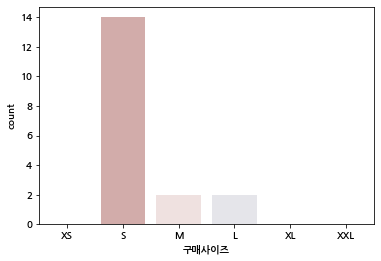

In [ ]:
sns.countplot(df5[(df5['체형'] == '마른체형')&(df5['사이즈'] == '보통이에요')]['구매사이즈'],order=['XS','S','M','L','XL','XXL'], palette = 'vlag_r')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='구매사이즈', ylabel='count'>

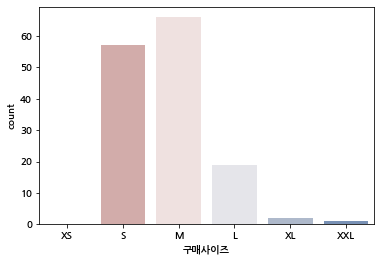

In [ ]:
sns.countplot(df5[(df5['체형'] == '표준')&(df5['사이즈'] == '보통이에요')]['구매사이즈'],order=['XS','S','M','L','XL','XXL'], palette = 'vlag_r')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='구매사이즈', ylabel='count'>

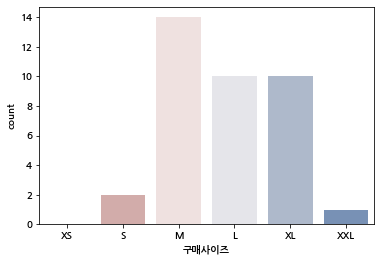

In [ ]:
sns.countplot(df5[(df5['체형'] == '비만')&(df5['사이즈'] == '보통이에요')]['구매사이즈'],order=['XS','S','M','L','XL','XXL'],palette = 'vlag_r')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='구매사이즈', ylabel='count'>

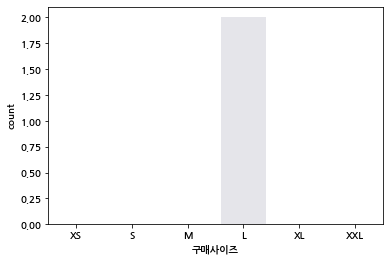

In [ ]:
sns.countplot(df5[(df5['체형'] == '고도비만')&(df5['사이즈'] == '보통이에요')]['구매사이즈'],order=['XS','S','M','L','XL','XXL'],palette = 'vlag_r')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


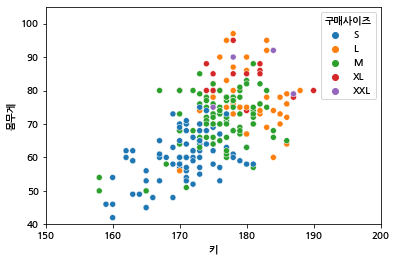

<Figure size 3600x7200 with 0 Axes>

In [ ]:
sns.scatterplot(df5['키'], df5['몸무게'], hue=df5['구매사이즈'])
plt.xlim(150,200)
plt.ylim(40,105)

plt.figure(figsize=(50, 100))
plt.show()

## 3. 데이터 합치기

- 전처리가 완료된 고객 분석 데이터를 합쳐줍니다. 

- 체형별('마른체형','표준','비만','고도비만')로 고객을 분류하고 각 범주의 고객이 실제 착용감을 '보통이에요'라고 평가한 경우만을 살펴봅니다.

- 각 체형별로 구매한 사이즈 분포와 빈도를 살펴봅니다.

In [ ]:
nike_df = df5.copy()

In [ ]:
adidas_df = pd.read_csv('ADIDAS0.csv')

In [ ]:
mu_df = pd.read_csv('musinsa최종.csv')

<ipython-input-59-7fb7c2f75d14>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.countplot(nike_df[(df4['체형'] == '마른체형')&(df4['사이즈'] == '보통이에요')]['구매사이즈'],order=['XS','S','M','L','XL','XXL'],palette = 'vlag_r')
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following var

Text(0.5, 1.0, '무신사스탠다드')

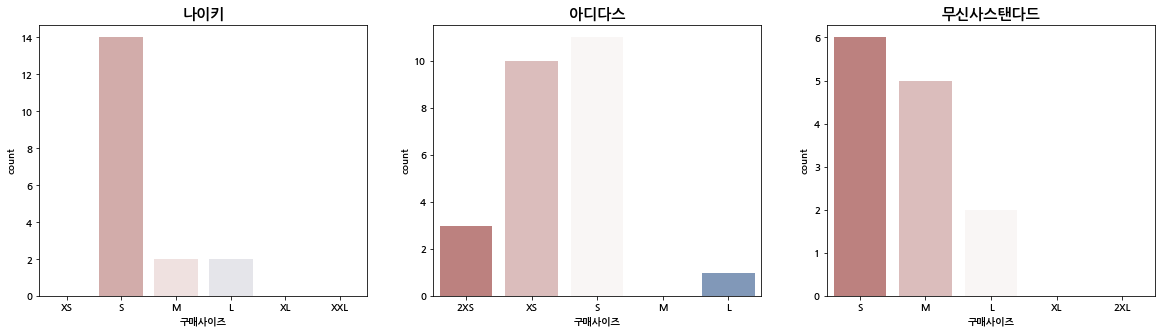

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.countplot(nike_df[(df4['체형'] == '마른체형')&(df4['사이즈'] == '보통이에요')]['구매사이즈'],order=['XS','S','M','L','XL','XXL'],palette = 'vlag_r')
plt.title('나이키', fontsize=15)
plt.subplot(1, 3, 2)
sns.countplot(adidas_df[(adidas_df ['체형'] == '마른체형')&(adidas_df['사이즈'] == '보통이에요')]['구매사이즈'],order=['2XS','XS','S','M','L'],palette = 'vlag_r')
plt.title('아디다스', fontsize=15)
plt.subplot(1, 3, 3)
sns.countplot(mu_df[(mu_df ['체형'] == '마른체형')&(mu_df['사이즈'] == '보통이에요')]['구매사이즈'],order=['S','M','L','XL','2XL'],palette = 'vlag_r')
plt.title('무신사스탠다드', fontsize=15)
# plt.subplot(4, 3, 4)
# plt.subplot(4, 3, 5)
# plt.subplot(4, 3, 6)
# plt.subplot(4, 3, 7)
# plt.subplot(4, 3, 8)
# plt.subplot(4, 3, 9)
# plt.subplot(4, 3, 10)
# plt.subplot(4, 3, 11)
# plt.subplot(4, 3, 12)


### 마른체형의 경우:
> - 나이키 S > M = L
> - 아디다스 XS > S 
> - 무신사스탠다드 S > M

<ipython-input-60-c33cdc298cff>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.countplot(nike_df[(df4['체형'] == '표준')&(df4['사이즈'] == '보통이에요')]['구매사이즈'],order=['XS','S','M','L','XL','XXL'],palette = 'vlag_r')
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following varia

Text(0.5, 1.0, '무신사스탠다드')

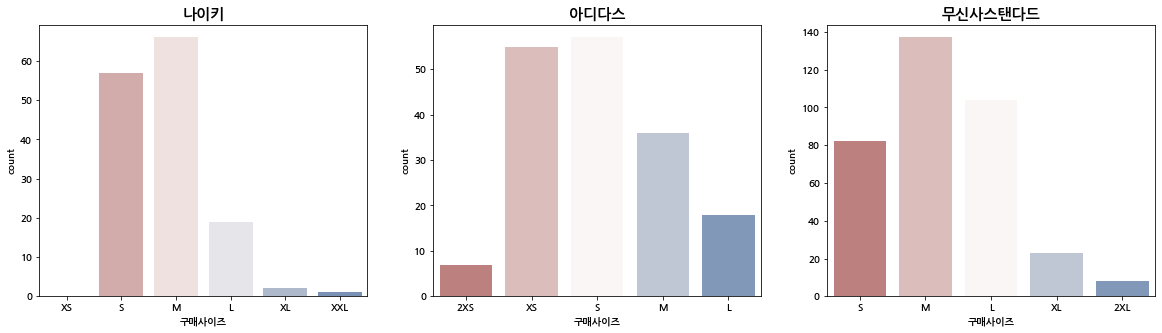

In [ ]:
plt.figure(figsize=(20, 11))
plt.subplot(2, 3, 1)
sns.countplot(nike_df[(df4['체형'] == '표준')&(df4['사이즈'] == '보통이에요')]['구매사이즈'],order=['XS','S','M','L','XL','XXL'],palette = 'vlag_r')
plt.title('나이키', fontsize=15)
plt.subplot(2, 3, 2)
sns.countplot(adidas_df[(adidas_df ['체형'] == '표준')&(adidas_df['사이즈'] == '보통이에요')]['구매사이즈'],order=['2XS','XS','S','M','L'],palette = 'vlag_r')
plt.title('아디다스', fontsize=15)
plt.subplot(2, 3, 3)
sns.countplot(mu_df[(mu_df ['체형'] == '표준')&(mu_df['사이즈'] == '보통이에요')]['구매사이즈'],order=['S','M','L','XL','2XL'],palette = 'vlag_r')
plt.title('무신사스탠다드', fontsize=15)

### 표준체형의 경우:
> - 나이키 M > S
> - 아디다스 S > XS 
> - 무신사스탠다드 M > L

In [ ]:
df4.columns

Index(['사이즈', '밝기', '색감', '두께감', '구매사이즈', '컬러', '성별', '키', '몸무게', 'bmi', '체형'], dtype='object')

<ipython-input-63-4577151c1693>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.countplot(nike_df[(df4['체형'] == '비만')&(df4['사이즈'] == '보통이에요')]['구매사이즈'],order=['XS','S','M','L','XL','XXL'], palette = 'vlag_r')
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following vari

Text(0.5, 1.0, '무신사스탠다드')

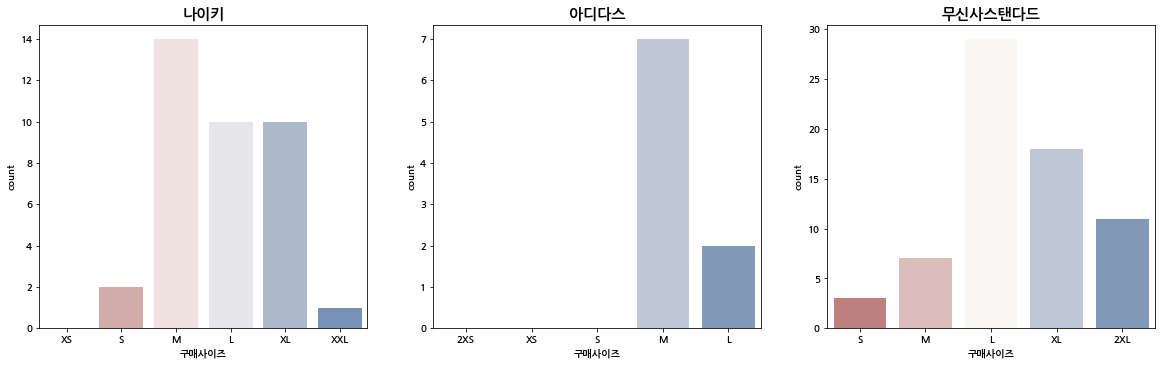

In [ ]:
plt.figure(figsize=(20, 19))
plt.subplot(3, 3, 1)
sns.countplot(nike_df[(df4['체형'] == '비만')&(df4['사이즈'] == '보통이에요')]['구매사이즈'],order=['XS','S','M','L','XL','XXL'], palette = 'vlag_r')
plt.title('나이키', fontsize=15)
plt.subplot(3, 3, 2)
sns.countplot(adidas_df[(adidas_df ['체형'] == '비만')&(adidas_df['사이즈'] == '보통이에요')]['구매사이즈'],order=['2XS','XS','S','M','L'], palette = 'vlag_r')
plt.title('아디다스', fontsize=15)
plt.subplot(3, 3, 3)
sns.countplot(mu_df[(mu_df ['체형'] == '비만')&(mu_df['사이즈'] == '보통이에요')]['구매사이즈'],order=['S','M','L','XL','2XL'], palette = 'vlag_r')
plt.title('무신사스탠다드', fontsize=15)

### 비만체형의 경우:
> - 나이키 M > L = XL
> - 아디다스 M > L 
> - 무신사스탠다드 L > XL

<ipython-input-66-04fc010bc761>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.countplot(nike_df[(df4['체형'] == '고도비만')&(df4['사이즈'] == '보통이에요')]['구매사이즈'],order=['XS','S','M','L','XL','XXL'], palette = 'vlag_r')
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following va

Text(0.5, 1.0, '무신사스탠다드')

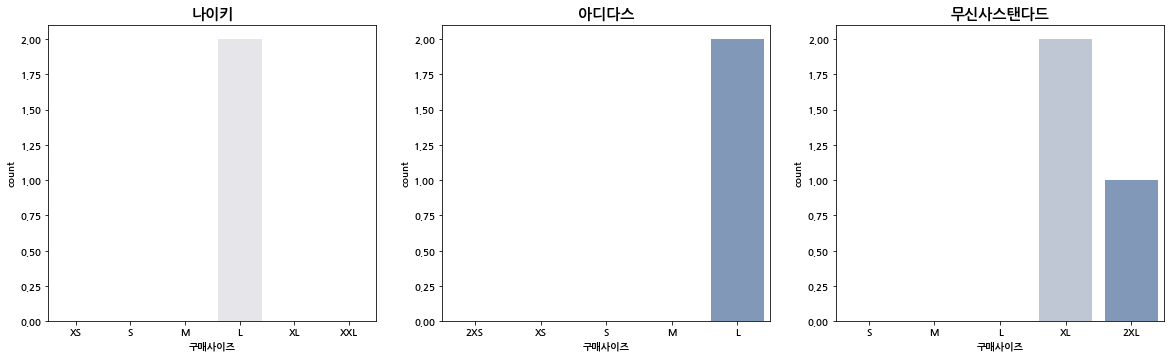

In [ ]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 3, 1)
sns.countplot(nike_df[(df4['체형'] == '고도비만')&(df4['사이즈'] == '보통이에요')]['구매사이즈'],order=['XS','S','M','L','XL','XXL'], palette = 'vlag_r')
plt.title('나이키', fontsize=15)
plt.subplot(2, 3, 2)
sns.countplot(adidas_df[(adidas_df ['체형'] == '고도비만')&(adidas_df['사이즈'] == '보통이에요')]['구매사이즈'],order=['2XS','XS','S','M','L'], palette = 'vlag_r')
plt.title('아디다스', fontsize=15)
plt.subplot(2, 3, 3)
sns.countplot(mu_df[(mu_df ['체형'] == '고도비만')&(mu_df['사이즈'] == '보통이에요')]['구매사이즈'],order=['S','M','L','XL','2XL'], palette = 'vlag_r')
plt.title('무신사스탠다드', fontsize=15)

### 고도비만체형의 경우:
> - 나이키 L
> - 아디다스 L 
> - 무신사스탠다드 XL > 2XL

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '무신사스탠다드')

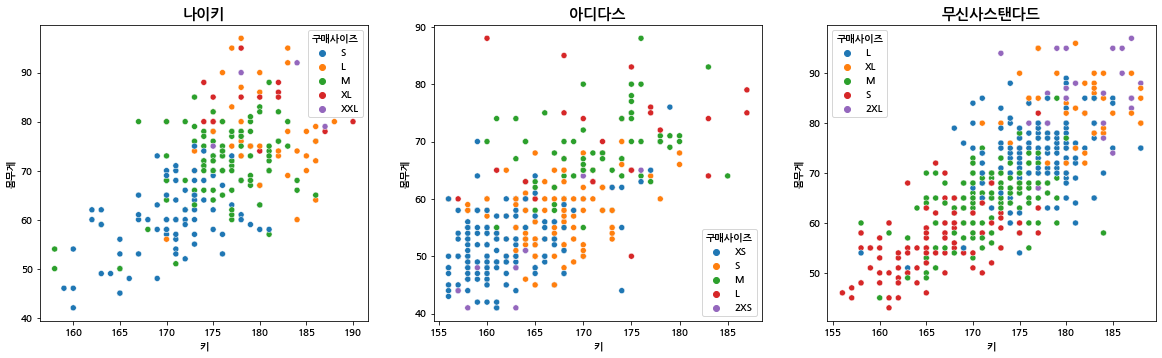

In [ ]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 3, 1)
sns.scatterplot(nike_df['키'], nike_df['몸무게'], hue=nike_df['구매사이즈'])
plt.title('나이키', fontsize=15)
plt.subplot(2, 3, 2)
sns.scatterplot(adidas_df['키'], adidas_df['몸무게'], hue=adidas_df['구매사이즈'])
plt.title('아디다스', fontsize=15)
plt.subplot(2, 3, 3)
sns.scatterplot(mu_df['키'], mu_df['몸무게'], hue=mu_df['구매사이즈'])
plt.title('무신사스탠다드', fontsize=15)

#### ※ 크롤링 분석 결과 아디다스가 사이즈가  크게 나왔고, 나이키가 약간 크게, 무신사스탠다드는 정사이즈로 나온것을 알 수 있다.

# 결론

### 나이키
- 베스트 팬츠는 밑단이 좁은 스타일의 조거팬츠
- 남성이 주로 구매
- 정사이즈 구매

-> 나이키 팬츠를 구매할 경우 정사이즈 또는 한사이즈 작은 사이즈로 구매하는 것을 추천

### 아디다스
- 아디다스의 베스트 팬츠는 오버핏의 트랙팬츠 
- 여성이 주로 구매. 
- 상품평을 보았을 때, 색상이 블랙과 그린으로 편안하면서도 포인트 되는 상품을 기획해 고객들의 구매를 유도한것 같다. 
여성과 남성 모두 xs사이즈를 가장 많이 구매. 사이즈가 크다는 평이 많다. 사이즈를 크게 제작.

-> 보통 체형이면 XS사이즈 구매 추천, 자신이 원하는 핏이나 각자의 체형 특성에 따라 다양한 사이즈 구매 가능

### 무신사 스탠다드
- 레귤러 핏의 스웨트 팬츠
- 남성이 주로 구매 
- 상품평을 보았을 때, 무신사 스탠다드의 베스트 팬츠는 편안하면서 핏이 무난하고(취향 안탐) 데일리웨어로 활용도가 높은 상품을 기획해 구매를 유도한 것 같다. 
- 크롤링과 분석결과를 보아 적당, 보통이라는 평이 대부분이다.

-> 정사이즈 구매 추천. 
## 인사이트
- bmi로 계산된 기준에 따라 고객별 사이즈 추천을 하는 서비스구현 가능

- 베스트 팬츠의 특성을 알 수 있었다. 
> ☞ 베스트 팬츠의 특성과 고객의 반응을 분석하여 마케팅 전략을 세울 수 있다.
> 
> ☞ 새로운 상품을 기획 할 때 참고 하는데에 활용 가능